Try to answer:
1. What is the distribution of conservation_status for animals?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which animal is most prevalent and what is their distribution amongst parks?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
observe = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

# Load the data and check how it looks like

In [3]:
observe

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [4]:
observe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [5]:
observe.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [6]:
observe["scientific_name"].describe()

count                23296
unique                5541
top       Myotis lucifugus
freq                    12
Name: scientific_name, dtype: object

Looks like there are 5541 unique species in the observe data

In [7]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [8]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [9]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


Therea re 5541 species and 7 category. Let's see what are those categories:

In [10]:
species["category"].unique().tolist()

['Mammal',
 'Bird',
 'Reptile',
 'Amphibian',
 'Fish',
 'Vascular Plant',
 'Nonvascular Plant']

Let's see the distribution of categories

In [11]:
species.groupby(by=["category"]).size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

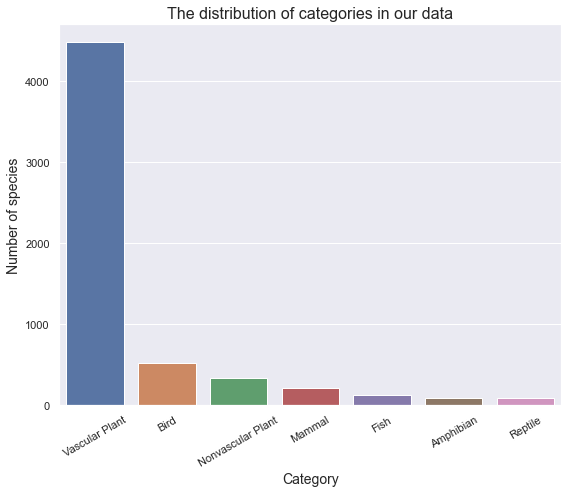

In [12]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(9,7))
sns.countplot(data=species,x="category",order = species['category'].value_counts().index)
plt.xticks(rotation=30)
plt.xlabel("Category",fontsize=14)
plt.ylabel("Number of species",fontsize=14)
plt.title("The distribution of categories in our data",fontsize=16)
plt.show()

1. What is the distribution of conservation_status for animals?

It asks animals. Let's first include all categories. Then we can check animals.

In [13]:
species.groupby(by=["conservation_status"]).size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [14]:
species.groupby(by=["conservation_status","category"]).size().unstack()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


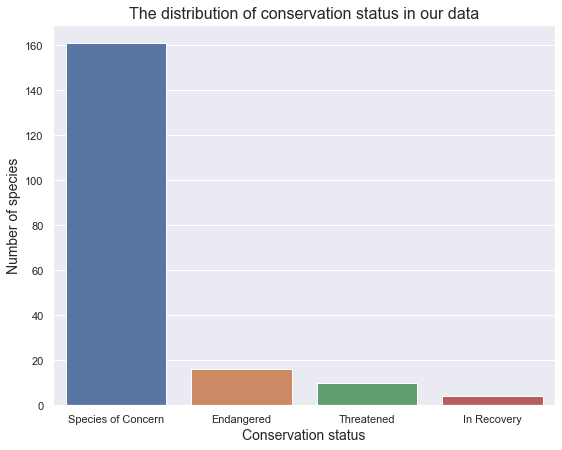

In [15]:
plt.figure(figsize=(9,7))
sns.countplot(data=species,x="conservation_status",order = species['conservation_status'].value_counts().index)
plt.xlabel("Conservation status",fontsize=14)
plt.ylabel("Number of species",fontsize=14)
plt.title("The distribution of conservation status in our data",fontsize=16)
plt.show()

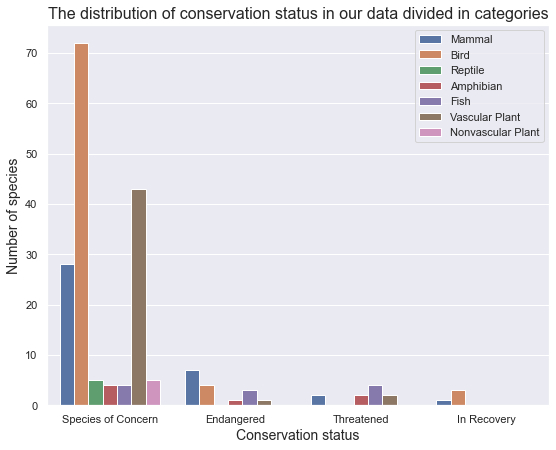

In [16]:

plt.figure(figsize=(9,7))
sns.countplot(data=species,x="conservation_status",hue="category",order = species['conservation_status'].value_counts().index)
plt.xlabel("Conservation status",fontsize=14)
plt.ylabel("Number of species",fontsize=14)
plt.title("The distribution of conservation status in our data divided in categories",fontsize=16)
plt.legend(loc='upper right')
plt.show()

In [17]:
only_animal = species[(species["category"] != "Vascular Plant") & (species["category"] != "Nonvascular Plant")]

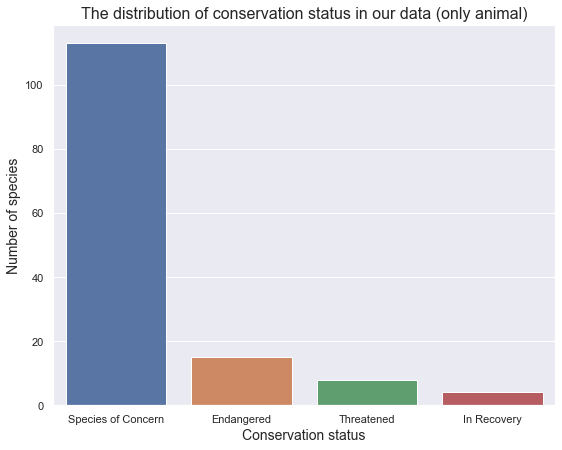

In [18]:
#only_animal
plt.figure(figsize=(9,7))
sns.countplot(data=only_animal,x="conservation_status",order = only_animal['conservation_status'].value_counts().index)
plt.xlabel("Conservation status",fontsize=14)
plt.ylabel("Number of species",fontsize=14)
plt.title("The distribution of conservation status in our data (only animal)",fontsize=16)
plt.show()

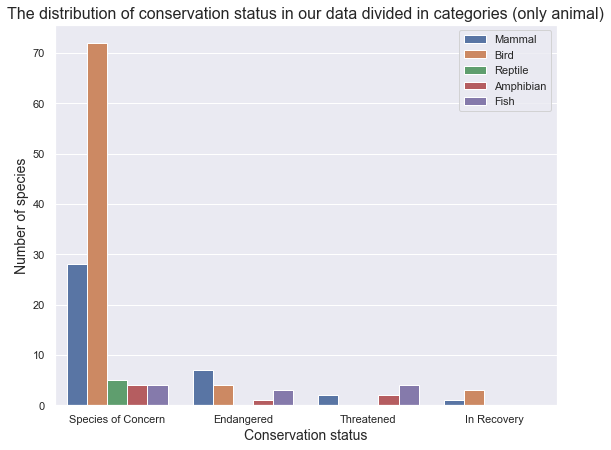

In [19]:
plt.figure(figsize=(9,7))
sns.countplot(data=only_animal,x="conservation_status",hue="category",order = only_animal['conservation_status'].value_counts().index)
plt.xlabel("Conservation status",fontsize=14)
plt.ylabel("Number of species",fontsize=14)
plt.title("The distribution of conservation status in our data divided in categories (only animal)",fontsize=16)
plt.legend(loc='upper right')
plt.show()

In [20]:
only_animal.groupby(by=["conservation_status","category"]).size().unstack()

category,Amphibian,Bird,Fish,Mammal,Reptile
conservation_status,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN
In Recovery,NaN,3.0,NaN,1.0,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0
Threatened,2.0,NaN,4.0,2.0,NaN


Text(0.5, 0.98, 'The distribution of conservation status in our data divided in categories (only animal)')

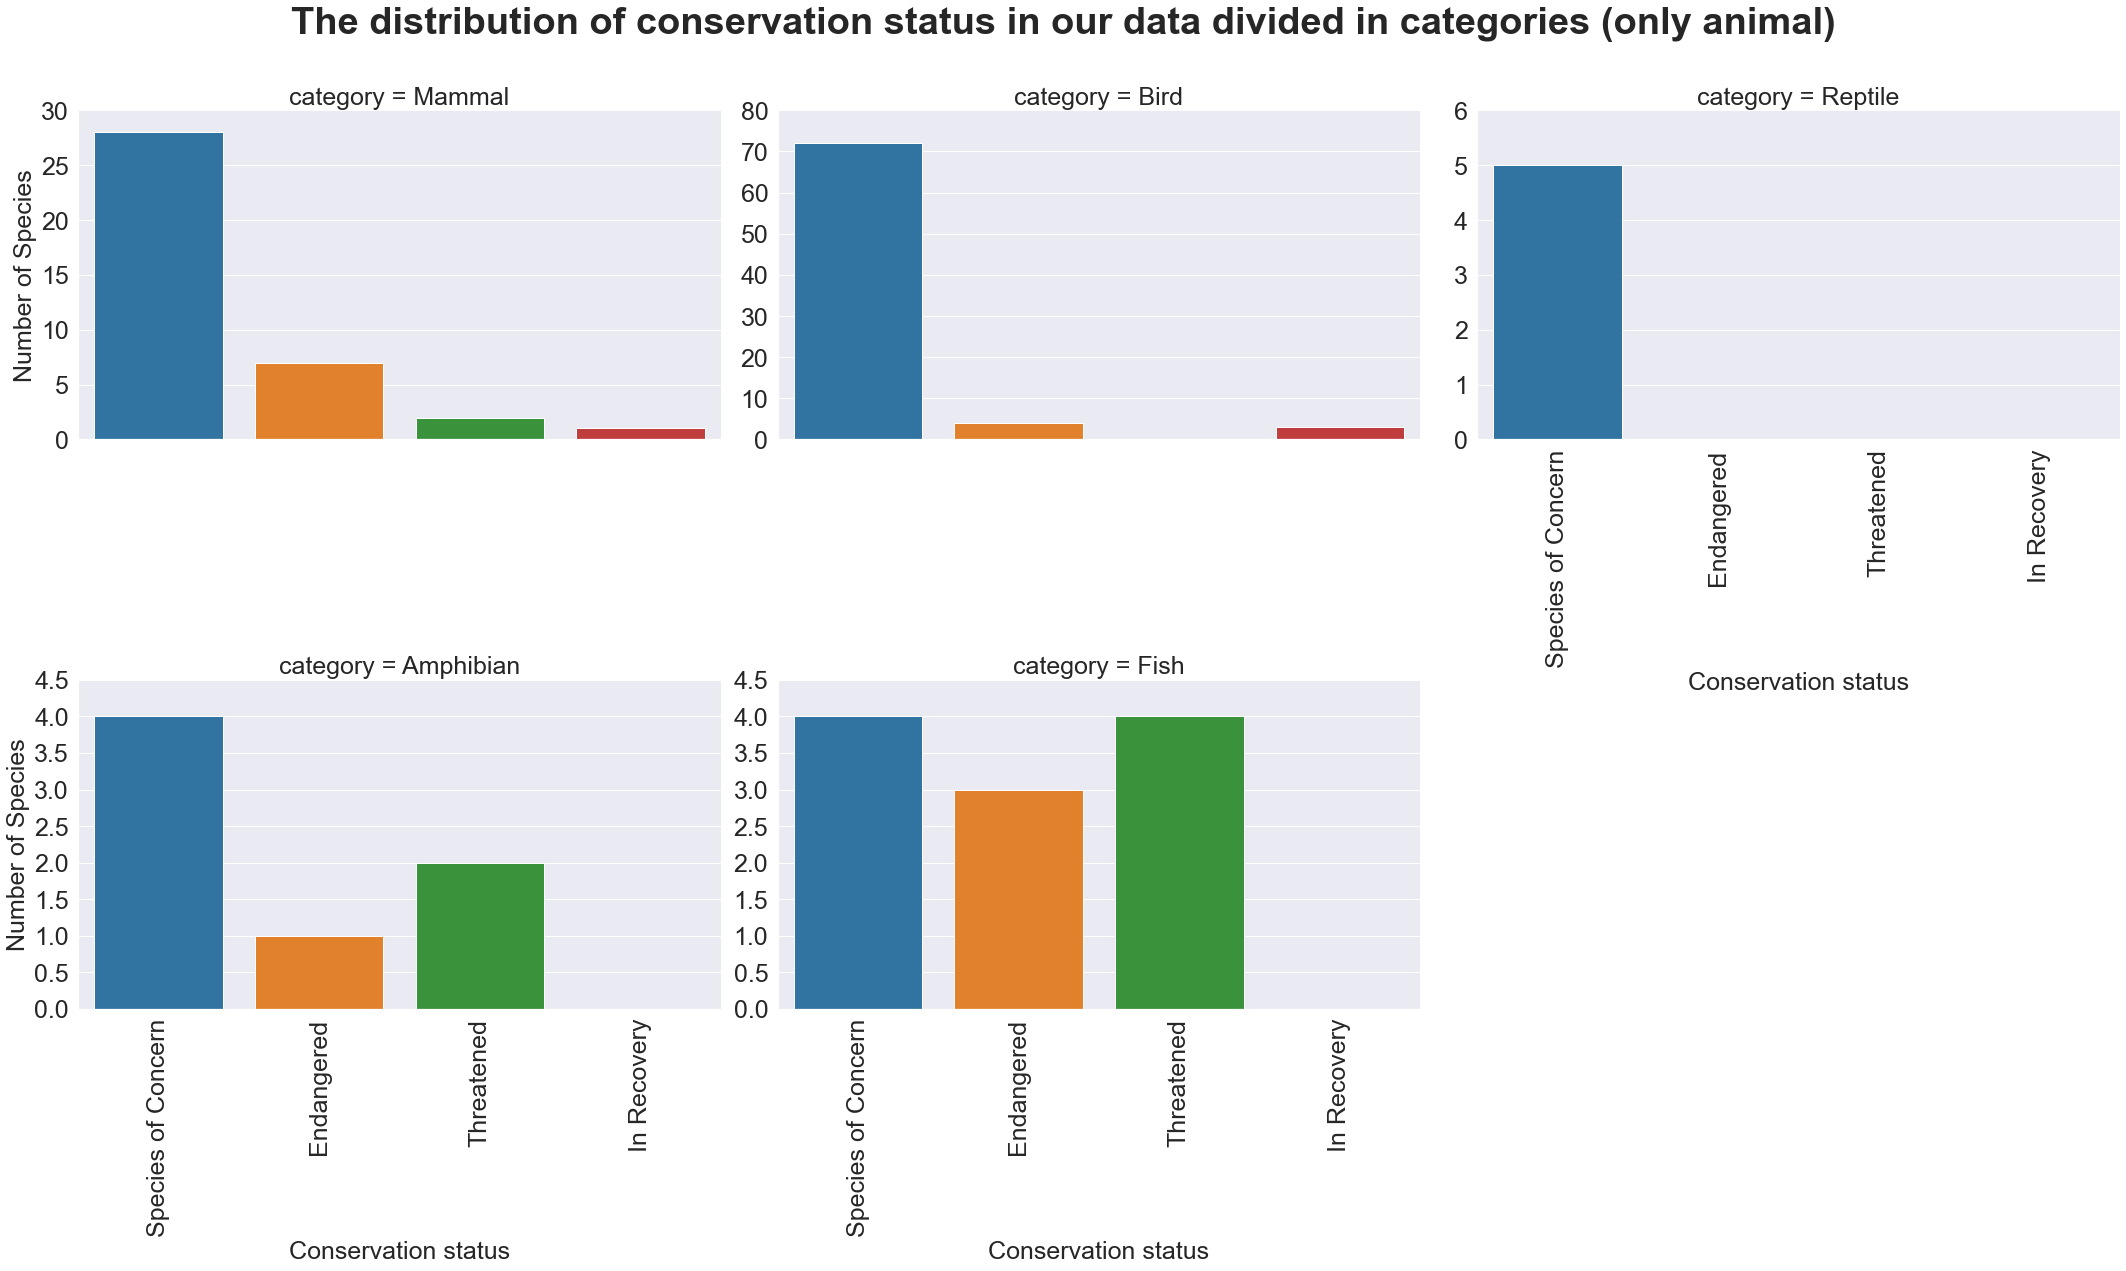

In [21]:
#sns.set(font_scale = 1)
g = sns.catplot(x="conservation_status", col="category",
                data=only_animal, kind="count",col_wrap=3, sharex=True, sharey=False, palette = sns.color_palette("tab10"),
                height=9, aspect=1.1, legend=True)
g.set_yticklabels(size = 25)
g.set_xticklabels(size = 25,rotation=90)
g.set_xlabels("Conservation status",size = 25)
g.set_ylabels("Number of Species",size = 25)
g.fig.tight_layout()
g.set_titles(size=25)
#plt.title("The distribution of conservation status in our data divided in categories (only animal)",fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("The distribution of conservation status in our data divided in categories (only animal)",fontweight="bold", size=38)
#g.set_axis_labels(size = 23)
#g.ylabel("Number of species",fontsize=14)

### 1. What is the distribution of conservation_status for animals?
### 2. Are certain types of species more likely to be endangered?
### 3. Are the differences between species and their conservation status significant?
- For animals, species of concern status is the most dominant status.
- Birds have more than 70 species that belongs to species of concern status.
- There is no treatened species for bird and reptile categories. 
- 4 fish species are treatened, while 2 (each) species are treatened for amphibian and mammal categories.
-
- Mammal category has the greatest number (7) of species that are endangered

### 4. Which animal is most prevalent and what is their distribution amongst parks?

In [23]:
observe.sort_values(by=['observations'],ascending=False)

,scientific_name,park_name,observations
11281,Lycopodium tristachyum,Yellowstone National Park,321
1168,Castilleja miniata,Yellowstone National Park,317
20734,Cryptantha fendleri,Yellowstone National Park,316
8749,Dracocephalum parviflorum,Yellowstone National Park,316
7112,Bidens tripartita,Yellowstone National Park,314
...,...,...,...
20375,Sambucus mexicana,Great Smoky Mountains National Park,12
18823,Rana sierrae,Great Smoky Mountains National Park,11
16054,Strix occidentalis,Great Smoky Mountains National Park,11
15511,Collomia tinctoria,Great Smoky Mountains National Park,10


In [26]:
observe.groupby(by=["scientific_name"]).sum().sort_values(by=['observations'],ascending=False)

,observations
scientific_name,
Streptopelia decaocto,1785
Holcus lanatus,1780
Castor canadensis,1725
Hypochaeris radicata,1720
Puma concolor,1711
...,...
Rana sierrae,144
Noturus baileyi,143
Vermivora bachmanii,141


#### Streptopelia decaocto is the most prevalent in our observe data.

In [27]:
observe[observe["scientific_name"] == "Streptopelia decaocto"]

,scientific_name,park_name,observations
1635,Streptopelia decaocto,Yellowstone National Park,255
3200,Streptopelia decaocto,Bryce National Park,92
3376,Streptopelia decaocto,Yosemite National Park,124
4515,Streptopelia decaocto,Bryce National Park,88
7057,Streptopelia decaocto,Great Smoky Mountains National Park,74
8072,Streptopelia decaocto,Bryce National Park,121
8710,Streptopelia decaocto,Yellowstone National Park,255
10107,Streptopelia decaocto,Great Smoky Mountains National Park,72
10643,Streptopelia decaocto,Yellowstone National Park,261
14699,Streptopelia decaocto,Great Smoky Mountains National Park,110


#### is this repetition ? I could not find any information in codecademy...
#### maybe the strains are different...

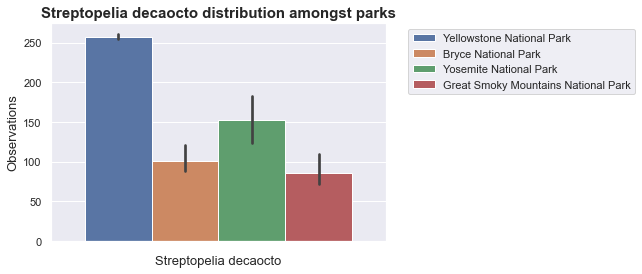

In [66]:
most_prevalent = observe[observe["scientific_name"] == "Streptopelia decaocto"]
ax = sns.barplot(x="scientific_name",hue="park_name",y="observations", data=most_prevalent)
ax.set(xticklabels=[])
plt.title("Streptopelia decaocto distribution amongst parks",size=15,fontweight="bold")
plt.xlabel("Streptopelia decaocto",size=13)
plt.ylabel("Observations",size=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
#plt.tight_layout()
plt.show()

#### 4. Which animal is most prevalent and what is their distribution amongst parks?
- Streptopelia decaocto is the most prevalent and, the number of observation is highest in the park Yellowstone. 2nd highest in park Yosemite. Park Bryce and Great Smoky have similar number of Streptopelia decaocto observations.